In [1]:
# Import the modules
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import linregress

%matplotlib inline

In [2]:
# Import data for homeless sheltered population and homeless total population in two csv files
sheltered_data_to_load = Path("Sheltered Homeless Population.csv")
population_data_to_load = Path("Homeless Population by State.csv")

# Read School and Student csv files and store in Pandas dataframes
homeless_sheltered = pd.read_csv(sheltered_data_to_load)
homeless_population = pd.read_csv(population_data_to_load)

# Use pd.merge method to combine the dataframe into a single set using outer join 
homeless_merged = pd.merge(homeless_sheltered, homeless_population, how="outer", on=["State", "State"])
homeless_merged.head()

,State,sheltered homeless population,percentage of homeless population that is sheltered,Total,Per10kResidents,ChronicallyHomeless,PeopleInFamilyUnits,SoloIndividuals,UnaccompaniedYouths,Veterans
0,Alabama,2172,60,3752,7.4,539,1270,2482,169,308
1,Alaska,1963,85,2320,31.7,576,560,1760,186,134
2,Arizona,5526,41,13553,18.6,2476,2846,10707,917,857
3,Arkansas,1163,47,2459,8.1,376,328,2131,251,92
4,California,56030,33,171521,43.7,57760,25538,145983,9590,10395


In [3]:
# Rename columns to be more intelligible to readers

homeless_merged = homeless_merged.rename(columns={'percentage of homeless population that is sheltered':'percent population sheltered',
                                                 'Total':'TotalPopulation'})

# Print first five rows of dataframe with renamed columns
homeless_merged.head()

,State,sheltered homeless population,percent population sheltered,TotalPopulation,Per10kResidents,ChronicallyHomeless,PeopleInFamilyUnits,SoloIndividuals,UnaccompaniedYouths,Veterans
0,Alabama,2172,60,3752,7.4,539,1270,2482,169,308
1,Alaska,1963,85,2320,31.7,576,560,1760,186,134
2,Arizona,5526,41,13553,18.6,2476,2846,10707,917,857
3,Arkansas,1163,47,2459,8.1,376,328,2131,251,92
4,California,56030,33,171521,43.7,57760,25538,145983,9590,10395


In [4]:
# Create ChronicPer10k column to measure chronic homeless population per 10,000 residents

homeless_merged['ChronicPer10k'] = \
    homeless_merged['Per10kResidents'] * homeless_merged['ChronicallyHomeless'] / homeless_merged['TotalPopulation']
# Create ShelteredPer10k column to calculate sheltered homeless population per 10,000 residents

homeless_merged['ShelteredPer10k'] = \
    homeless_merged['Per10kResidents'] * homeless_merged['sheltered homeless population'] / homeless_merged['TotalPopulation']

homeless_merged.head()

,State,sheltered homeless population,percent population sheltered,TotalPopulation,Per10kResidents,ChronicallyHomeless,PeopleInFamilyUnits,SoloIndividuals,UnaccompaniedYouths,Veterans,ChronicPer10k,ShelteredPer10k
0,Alabama,2172,60,3752,7.4,539,1270,2482,169,308,1.063060,4.283795
1,Alaska,1963,85,2320,31.7,576,560,1760,186,134,7.870345,26.822026
2,Arizona,5526,41,13553,18.6,2476,2846,10707,917,857,3.398037,7.583826
3,Arkansas,1163,47,2459,8.1,376,328,2131,251,92,1.238552,3.830948
4,California,56030,33,171521,43.7,57760,25538,145983,9590,10395,14.716052,14.275284


In [5]:
# Use .loc method to get pertinent columns we will need to do statistical hypothesis testing on

homeless_reduced = homeless_merged.loc[:, ['State','sheltered homeless population','percent population sheltered','TotalPopulation','Per10kResidents','ChronicallyHomeless','ChronicPer10k','ShelteredPer10k']]
homeless_reduced.head()

,State,sheltered homeless population,percent population sheltered,TotalPopulation,Per10kResidents,ChronicallyHomeless,ChronicPer10k,ShelteredPer10k
0,Alabama,2172,60,3752,7.4,539,1.063060,4.283795
1,Alaska,1963,85,2320,31.7,576,7.870345,26.822026
2,Arizona,5526,41,13553,18.6,2476,3.398037,7.583826
3,Arkansas,1163,47,2459,8.1,376,1.238552,3.830948
4,California,56030,33,171521,43.7,57760,14.716052,14.275284


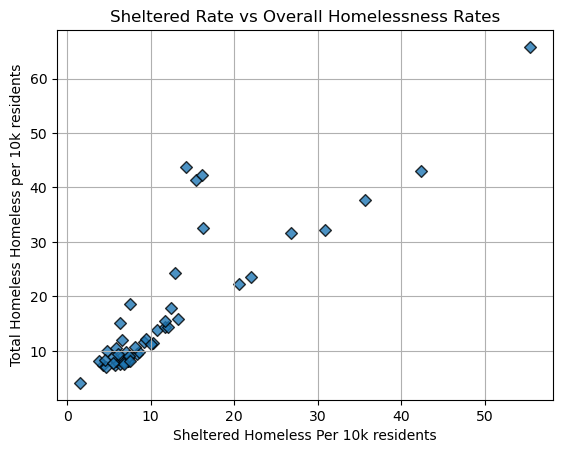

In [6]:
# Create scatter plot showing relationship scores between sheltered homeless population rate 
# and total homeless population rate


plt.scatter(     
    homeless_reduced["ShelteredPer10k"],
    homeless_reduced["Per10kResidents"],
    edgecolor="black",
    linewidths=1,
    marker="D", 
    alpha=0.8,

)

# Augment
plt.title("Sheltered Rate vs Overall Homelessness Rates")
plt.xlabel("Sheltered Homeless Per 10k residents")
plt.ylabel("Total Homeless Homeless per 10k residents")
plt.grid(True)


# Show plot
plt.show()

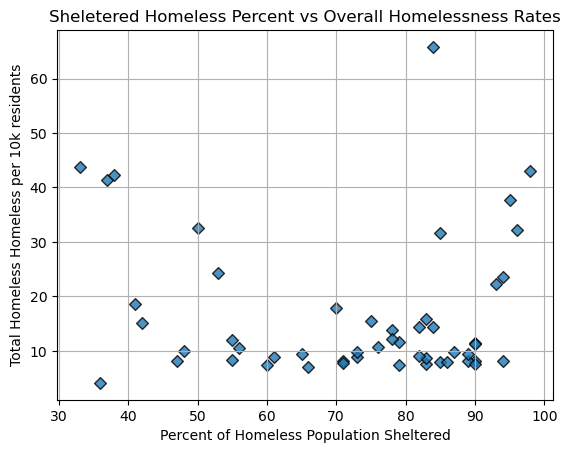

In [7]:
# Create scatter plot showing relationship scores between sheltered percent of homeless population
# and chronic homeless population rate


plt.scatter(     
    homeless_reduced["percent population sheltered"],
    homeless_reduced["Per10kResidents"],
    edgecolor="black",
    linewidths=1,
    marker="D", 
    alpha=0.8,

)

# Augment
plt.title("Sheletered Homeless Percent vs Overall Homelessness Rates")
plt.xlabel("Percent of Homeless Population Sheltered")
plt.ylabel("Total Homeless Homeless per 10k residents")
plt.grid(True)


# Show plot
plt.show()

In [8]:
# Regression analysis for each of the pairs below.

# Define a function
def plot_linear_regression(x_values, y_values, x_axis, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, sterr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel(x_axis)
    plt.ylabel(title)
    print(f"The r-squared value is: {rvalue**2}")
    print(f"The r value is: {rvalue}")
    print(f"The p value is: {pvalue}")
    plt.grid(True)
    plt.show()

The r-squared value is: 0.7561227976897767
The r value is: 0.8695532172844723
The p value is: 1.2540604033265988e-16


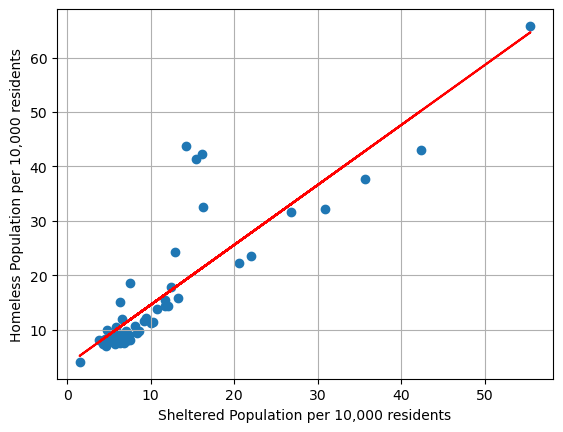

In [9]:
# Linear regression comparing total homeless rate by state as a function of sheltered homeless rate by state

x_values = homeless_reduced["ShelteredPer10k"]
y_values = homeless_reduced["Per10kResidents"]
plot_linear_regression(x_values, y_values, "Sheltered Population per 10,000 residents", "Homeless Population per 10,000 residents", (50,-50))

The r-squared value is: 0.007556228625647323
The r value is: -0.08692657030878029
The p value is: 0.5441563031972827


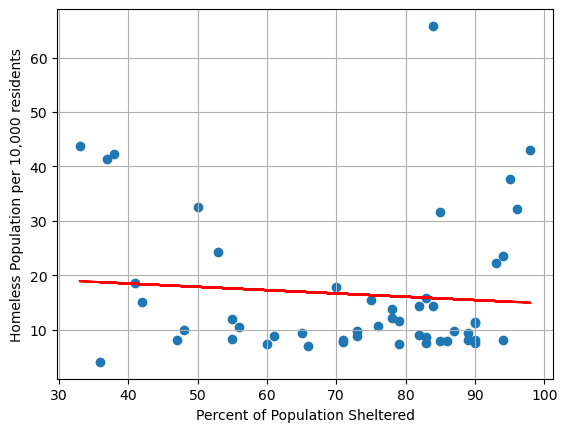

In [10]:
# Linear regression comparing total homeless rate by state as a funciton of percent homeless sheltered by state
x_values = homeless_reduced["percent population sheltered"]
y_values = homeless_reduced["Per10kResidents"]
plot_linear_regression(x_values, y_values, "Percent of Population Sheltered", "Homeless Population per 10,000 residents", (6,-10))